## Import packages

In [229]:
##Import neccessary packages
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [230]:
#Import original data with outliers
spotify_o = pd.read_csv('/Users/vanle/Desktop/MSBA/DSO 510 - BA/Spotify/Final_Spotify.csv')

In [231]:
spotify_o.columns

Index(['Unnamed: 0', 'artist_names', 'streams', '100M', 'track_name', 'tiktok',
       'peak_rank', 'weeks_on_chart', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'tempo', 'time_signature', 'duration_ms'],
      dtype='object')

In [232]:
#Import cleaned data
spotify = pd.read_csv('/Users/vanle/Desktop/MSBA/DSO 510 - BA/Spotify/No_Outliers_Final_Spotify.csv') ## we cleaned this from R file 

### Prepare data

In [261]:
#Drop unnecessary columns
#spotify = spotify.drop(columns = ['artist_names', 'X100M', 'acousticness','track_name', 'peak_rank','liveness', 'tempo', 'time_signature', 'key','mode', 'speechiness', 'instrumentalness', 'duration_ms'])
spotify_o = spotify_o.iloc[: , 1:]
spotify = spotify.iloc[: , 1:]

In [262]:
#Change titok variable to category
spotify = spotify.astype({'tiktok' : 'category'})

In [263]:
#Drop unnecessary columns
#spotify_o = spotify_o.drop(columns = ['artist_names', '100M', 'acousticness','track_name', 'peak_rank','liveness', 'tempo', 'time_signature', 'key','mode', 'speechiness', 'instrumentalness', 'duration_ms'])

In [264]:
##We want to log danceability and energy
spotify['LOG.danceability'] = np.log(spotify['danceability'])
spotify['LOG.energy'] = np.log(spotify['energy'])

In [266]:
#change the unit of number of streams to billion
spotify_o['streams'] = spotify_o['streams']/1000000000
#spotify_o['streams']

## Data exploration

#### Start with orginal dataset

### 1. Some statistics

In [236]:
#Final data --> add tiktok, mean & std 
import dataframe_image as dfi

stat = spotify.describe()
#stat = stat.drop(['count', 'min','max','25%','50%','75%','max'],axis = 0) 
stat

#stat.to_csv(r'/Users/vanle/Desktop/MSBA/DSO 510 - BA/Spotify/Spotify_stat.csv', index=False, header=True)

,Unnamed: 0,streams,X100M,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms,LOG.weeks_on_chart,LOG.danceability,LOG.energy
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,242.740492,16.808167,39.127517,60.923937,14.852349,0.690747,0.645904,4.955257,-6.268497,0.592841,0.115923,0.234413,0.008336,0.174438,120.746566,3.953020,207822.219239,1.690869,-0.389887,-0.472499
std,143.535967,13.893128,35.981302,55.475592,20.504306,0.132874,0.157342,3.655301,2.339528,0.491855,0.103356,0.255839,0.048973,0.127975,27.603832,0.306921,57177.885821,1.495455,0.204066,0.281414
min,1.000000,1.422921,0.000000,1.000000,1.000000,0.398000,0.189000,0.000000,-16.169000,0.000000,0.025600,0.000035,0.000000,0.026400,67.289000,1.000000,91870.000000,0.000000,-0.921303,-1.666008
25%,118.500000,5.408385,12.000000,14.000000,1.000000,0.587500,0.541500,1.000000,-7.454000,0.000000,0.042150,0.036900,0.000000,0.093100,99.977500,4.000000,173111.500000,0.000000,-0.531879,-0.613413
50%,240.000000,13.347421,29.000000,44.000000,5.000000,0.709000,0.657000,5.000000,-5.883000,1.000000,0.067300,0.133000,0.000002,0.120000,119.959000,4.000000,202174.000000,1.609438,-0.343900,-0.420071
75%,365.500000,25.713655,57.000000,100.000000,20.000000,0.794000,0.769000,8.000000,-4.604000,1.000000,0.162500,0.353500,0.000102,0.230500,139.956500,4.000000,231500.000000,2.995732,-0.230672,-0.262664
max,496.000000,50.162293,130.000000,198.000000,104.000000,0.954000,0.959000,11.000000,-2.171000,1.000000,0.470000,0.969000,0.724000,0.923000,196.120000,5.000000,613027.000000,4.644391,-0.047092,-0.041864



### 1. Weeks on chart

In [246]:
## For with and without outliers
outliers = spotify_o['weeks_on_chart']
no_outliers= spotify["weeks_on_chart"]
data = {"outliers": outliers,
        "no_outliers": no_outliers}
df = pd.concat(data,
               axis = 1)
df 

,outliers,no_outliers
0,1,1.0
1,85,85.0
2,6,6.0
3,1,1.0
4,16,16.0
...,...,...
491,12,NaN
492,1,NaN
493,216,NaN
494,5,NaN


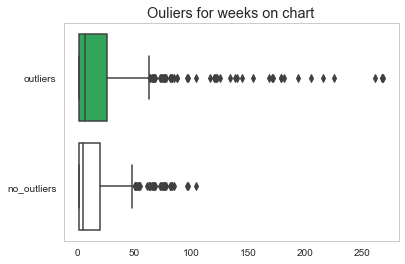

In [256]:
#Plot boxplot to compare
fig.set_size_inches(15, 5)
my_pal1 = {"outliers": "#1DB954", "no_outliers": "white"}
sns.boxplot(data=df,orient="h", palette=my_pal1).set(title='Ouliers for weeks on chart')
plt.savefig('demo11.png', transparent=True)

In [248]:
#For before and after log 
log_week = spotify[['weeks_on_chart',"LOG.weeks_on_chart"]]
log_week

,weeks_on_chart,LOG.weeks_on_chart
0,1,0.000000
1,85,4.442651
2,6,1.791759
3,1,0.000000
4,16,2.772589
...,...,...
442,35,3.555348
443,12,2.484907
444,1,0.000000
445,5,1.609438


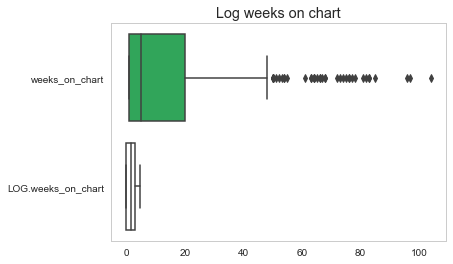

In [257]:
fig.set_size_inches(15, 5)
my_pal2 = {"weeks_on_chart": "#1DB954", "LOG.weeks_on_chart": "white"}
sns.boxplot(data=log_week,orient="h", palette=my_pal2 ).set(title='Log weeks on chart')
plt.savefig('demo12.png', transparent=True)

### 2. Dancebility variable

In [249]:
#For outliers for danceability
outliers1 = spotify_o['danceability']
no_outliers1= spotify["danceability"]
data1 = {"outliers_danc": outliers1,
        "no_outliers_danc": no_outliers1}
df1 = pd.concat(data1,
               axis = 1)
df1 

,outliers_danc,no_outliers_danc
0,0.755,0.755
1,0.701,0.701
2,0.899,0.899
3,0.727,0.727
4,0.730,0.730
...,...,...
491,0.746,NaN
492,0.853,NaN
493,0.872,NaN
494,0.723,NaN


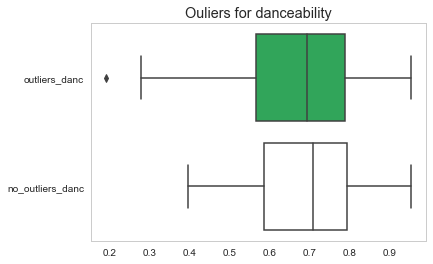

In [260]:
fig.set_size_inches(15, 5)
my_pal1 = {"outliers_danc": "#1DB954", "no_outliers_danc": "white"}
sns.boxplot(data=df1,orient="h", palette=my_pal1).set(title='Ouliers for danceability')
plt.savefig('demo11.png', transparent=True)

In [250]:
#For before and after log 
log_dance = spotify[['danceability',"LOG.danceability"]]
log_dance

,danceability,LOG.danceability
0,0.755,-0.281038
1,0.701,-0.355247
2,0.899,-0.106472
3,0.727,-0.318829
4,0.730,-0.314711
...,...,...
442,0.592,-0.524249
443,0.746,-0.293030
444,0.853,-0.158996
445,0.723,-0.324346


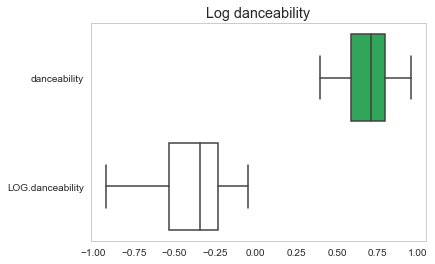

In [259]:
fig.set_size_inches(15, 5)
my_pal3 = {"danceability": "#1DB954", "LOG.danceability": "white"}
sns.boxplot(data=log_dance,orient="h",  palette=my_pal3 ).set(title='Log danceability')
plt.savefig('demo14.png', transparent=True)

### 3. Danceability vs Weeks on chart

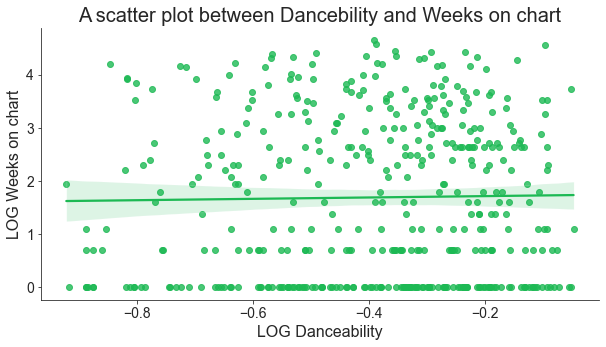

In [12]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.regplot(x=spotify["LOG.danceability"], y=spotify["LOG.weeks_on_chart"], color = '#1DB954', ax=ax)
sns.despine()
plt.xlabel('LOG Danceability', fontsize=16);
plt.ylabel('LOG Weeks on chart', fontsize=16);
plt.title('A scatter plot between Dancebility and Weeks on chart', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('demo2.png', transparent=True)

### 3. Control variable TikTok 

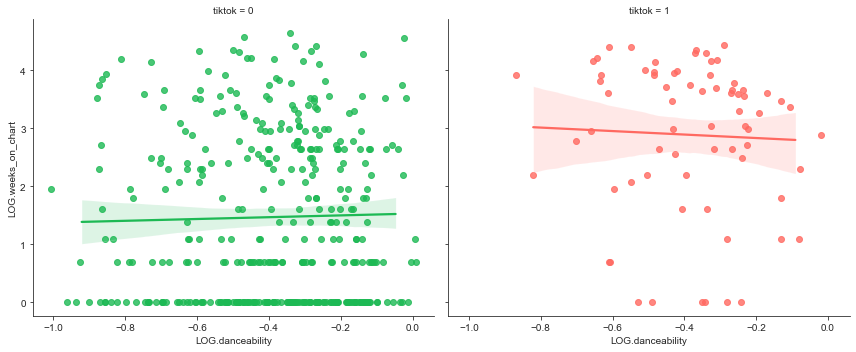

In [13]:
d = {'color': ['#1DB954', '#ff6961']}
g = sns.FacetGrid(spotify, col="tiktok", hue="tiktok",margin_titles=True,height=5, aspect=1.2,  hue_kws=d) #Initialize empty grid
g.map(sns.regplot, "LOG.danceability", 'LOG.weeks_on_chart', color='#1DB954', fit_reg=True, x_jitter=.1)
plt.savefig('demo3.png', transparent=True)
#g = sns.FacetGrid(df, row='Sex', col='Survived', hue_kws=d, hue='Survived')
#g.map(plt.hist, 'Age')

### 4. Check correlation among variables

In [269]:
#Modify our data -- only keep main variables
df3 = spotify.drop(columns = ['artist_names', 'X100M', 'acousticness','track_name', 'peak_rank','liveness', 'tempo', 'time_signature', 'key','mode', 'speechiness', 'instrumentalness', 'duration_ms'])

In [271]:
matrix = df3.corr()
print(matrix)

                     streams  weeks_on_chart  danceability    energy  \
streams             1.000000        0.052567      0.013409 -0.033314   
weeks_on_chart      0.052567        1.000000     -0.036854  0.089878   
danceability        0.013409       -0.036854      1.000000  0.109735   
energy             -0.033314        0.089878      0.109735  1.000000   
loudness           -0.165203        0.146630      0.189511  0.699277   
LOG.weeks_on_chart  0.083745        0.854138      0.004720  0.122555   
LOG.danceability    0.022225       -0.024646      0.993862  0.124274   
LOG.energy         -0.030243        0.092582      0.149712  0.981083   

                    loudness  LOG.weeks_on_chart  LOG.danceability  LOG.energy  
streams            -0.165203            0.083745          0.022225   -0.030243  
weeks_on_chart      0.146630            0.854138         -0.024646    0.092582  
danceability        0.189511            0.004720          0.993862    0.149712  
energy              0.69927

In [272]:
spotify

,artist_names,streams,X100M,track_name,tiktok,peak_rank,weeks_on_chart,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms,LOG.weeks_on_chart,LOG.danceability,LOG.energy
0,(G)I-DLE,1.549107,5,TOMBOY,0,189,1,0.755,0.870,1,...,0.0936,0.00988,0.000000,0.0917,124.032,4,174387,0.000000,-0.281038,-0.139262
1,24kGoldn,3.705649,7,Mood (feat. iann dior),1,1,85,0.701,0.716,7,...,0.0361,0.17400,0.000000,0.3240,91.007,4,140533,4.442651,-0.355247,-0.334075
2,50 Cent,6.248846,14,In Da Club,0,77,6,0.899,0.713,6,...,0.3660,0.25500,0.000000,0.0708,90.051,4,193467,1.791759,-0.106472,-0.338274
3,A$AP Rocky,7.788611,19,D.M.B.,0,159,1,0.727,0.616,8,...,0.3380,0.54200,0.000004,0.4820,140.014,4,291612,0.000000,-0.318829,-0.484508
4,Adele,15.561220,28,Rolling in the Deep,0,36,16,0.730,0.769,8,...,0.0298,0.13800,0.000000,0.0473,104.948,4,228093,2.772589,-0.314711,-0.262664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,XXXTENTACION,21.726799,44,Hope,0,42,35,0.592,0.457,9,...,0.0603,0.66100,0.000331,0.1460,146.040,4,110886,3.555348,-0.524249,-0.783072
443,XXXTENTACION,21.726799,44,Revenge,0,63,12,0.746,0.251,11,...,0.2590,0.78200,0.002030,0.1060,139.999,4,120027,2.484907,-0.293030,-1.382302
444,XXXTENTACION,21.726799,44,vice city,0,181,1,0.853,0.467,9,...,0.1950,0.00596,0.001710,0.2030,87.023,4,220709,0.000000,-0.158996,-0.761426
445,Yung Gravy,1.959097,6,Betty (Get Money),1,78,5,0.723,0.772,1,...,0.0792,0.00524,0.000012,0.3670,102.004,4,146471,1.609438,-0.324346,-0.258771


### 5. Regression Model

In [273]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
x = spotify[['LOG.danceability', 'streams', 'tiktok', 'loudness']]
y = spotify['LOG.weeks_on_chart']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)
print('#'*40+'Summary'+'#'*40)
print('Intercept: \n', regr.intercept_)
print('-'*80)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)


y_true = y
y_pred = model.predict(x)
xs = x

def press_statistic(y_true, y_pred, xs):
    """
    Calculation of the `Press Statistics <https://www.otexts.org/1580>`_
    """
    res = y_pred - y_true
    hat = xs.dot(np.linalg.pinv(xs))
    den = (1 - np.diagonal(hat))
    sqr = np.square(res/den)
    return sqr.sum()

def predicted_r2(y_true, y_pred, xs):
    """
    Calculation of the `Predicted R-squared <https://rpubs.com/RatherBit/102428>`_
    """
    press = press_statistic(y_true=y_true,
                            y_pred=y_pred,
                            xs=xs
    )

    sst  = np.square( y_true - y_true.mean() ).sum()
    return 1 - press / sst
 
def r2(y_true, y_pred):
    """
    Calculation of the unadjusted r-squared, goodness of fit metric
    """
    sse  = np.square( y_pred - y_true ).sum()
    sst  = np.square( y_true - y_true.mean() ).sum()
    return 1 - sse/sst
print('-'*80)
#print (predicted_r2(y_true, y_pred, xs)

########################################Summary########################################
Intercept: 
 1.8793073795530755
--------------------------------------------------------------------------------
Coefficients: 
 [-0.18808313  0.01456124  1.37480473  0.11514904]
                            OLS Regression Results                            
Dep. Variable:     LOG.weeks_on_chart   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     21.10
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           6.19e-16
Time:                        22:06:09   Log-Likelihood:                -774.60
No. Observations:                 447   AIC:                             1559.
Df Residuals:                     442   BIC:                             1580.
Df Model:                           4                                         
Covariance Type:      

In [274]:
y_true = y
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
0      1.676753
1      2.952175
2      1.673434
3      1.075416
4      1.576218
         ...   
442    1.594057
443    0.388946
444    1.437616
445    2.562472
446    1.308738
Length: 447, dtype: float64
